In [ ]:
'''
Documentation:
Topic: Apply the filter based feature selection to rank and select the best set of features for the movie genre prediction task.
Use the dataset given below:
Dataset: https://www.kaggle.com/balakrishcodes/others?select=Movie_classification.csv

METHODOLOGY
Part 1: 
Read and parse the initial dataset
Load it into our pandas dataframe
Display the dataset with feature information
Part 2: 
Split our dataset into its attributes and labels
Preprocessing the data
Part 3:
Apply mutual information gain measure.
Print the feature importance score and select the best 5 features.
Compare the performance without feature selection and with feature selection.
'''

In [1]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

In [2]:
# loading the dataset
df=pd.read_csv('Movie_classification.csv') #Reads the csv file
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df.isnull().sum() #12 null values in the Time_taken column

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [4]:
#to remove the null values, we can remove it or replace it with mean of the rest of the values.
#we will replace null values with the mean of the non null values in the column
df_mean=df.dropna() #It deletes all rows where NaN is found.
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    494 non-null    float64
 1   Production expense   494 non-null    float64
 2   Multiplex coverage   494 non-null    float64
 3   Budget               494 non-null    float64
 4   Movie_length         494 non-null    float64
 5   Lead_ Actor_Rating   494 non-null    float64
 6   Lead_Actress_rating  494 non-null    float64
 7   Director_rating      494 non-null    float64
 8   Producer_rating      494 non-null    float64
 9   Critic_rating        494 non-null    float64
 10  Trailer_views        494 non-null    int64  
 11  3D_available         494 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      494 non-null    float64
 14  Genre                494 non-null    object 
 15  Avg_age_actors       494 non-null    int

In [5]:
#Fill the missing values with mean of the non null values
mean_value_tt=df['Time_taken'].mean() #Finds the mean value of the non null values in the Time_taken column
df['Time_taken']=df['Time_taken'].fillna(mean_value_tt) #Replaces NaN values with the output mean
print(mean_value_tt)

157.3914979757085


In [6]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [7]:
uv = df.nunique()
print('Count of unique values in each column :')
print(uv)

Count of unique values in each column :
Marketing expense      504
Production expense      76
Multiplex coverage      81
Budget                 446
Movie_length           356
Lead_ Actor_Rating     339
Lead_Actress_rating    354
Director_rating        339
Producer_rating        353
Critic_rating           74
Trailer_views          504
3D_available             2
Time_taken             450
Twitter_hastags        423
Genre                    4
Avg_age_actors          42
Num_multiplex          293
Collection             228
Start_Tech_Oscar         2
dtype: int64


In [8]:
# for 3D_available, Genre and Start_Tech_Oscar column, we use label encoder

In [9]:
#using label encoder
le = preprocessing.LabelEncoder()
df.iloc[:,11:12]=df.iloc[:,11:12].apply(le.fit_transform)
df.iloc[:,14:15]=df.iloc[:,14:15].apply(le.fit_transform)
print(df.iloc[:,11:12])
print(df.iloc[:,14:15])

     3D_available
0               1
1               0
2               0
3               1
4               0
..            ...
501             0
502             1
503             0
504             1
505             1

[506 rows x 1 columns]
     Genre
0        3
1        2
2        1
3        2
4        2
..     ...
501      0
502      0
503      1
504      1
505      1

[506 rows x 1 columns]


In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Feature 0: 0.027665
Feature 1: 0.000000
Feature 2: 0.037357
Feature 3: 0.047658
Feature 4: 0.000000
Feature 5: 0.062611
Feature 6: 0.036238
Feature 7: 0.012717
Feature 8: 0.017302
Feature 9: 0.000000
Feature 10: 0.032684
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.031426
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.000195
Feature 17: 0.051596


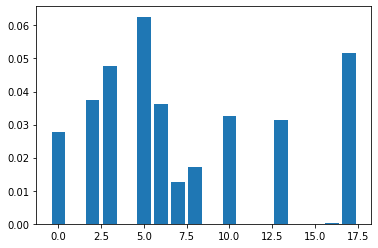

In [11]:
# mutual information gain measure (mutual_info_classif)
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 29.316487
Feature 1: 1.513034
Feature 2: 0.016534
Feature 3: 295.590517
Feature 4: 2.154403
Feature 5: 0.266094
Feature 6: 0.325796
Feature 7: 0.289075
Feature 8: 0.311973
Feature 9: 0.000029
Feature 10: 8151.670437
Feature 11: 0.291965
Feature 12: 2.931468
Feature 13: 164.350559
Feature 14: 0.205508
Feature 15: 9.165107
Feature 16: 15.620124
Feature 17: 77395.816855


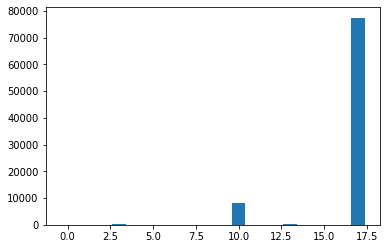

In [12]:
# feature selection - chi2
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=chi2, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 0.095427
Feature 1: 0.623209
Feature 2: 0.527134
Feature 3: 0.692954
Feature 4: 0.383204
Feature 5: 1.858656
Feature 6: 2.332737
Feature 7: 2.008096
Feature 8: 2.257092
Feature 9: 0.000557
Feature 10: 0.742924
Feature 11: 0.620197
Feature 12: 0.461985
Feature 13: 2.848057
Feature 14: 0.313055
Feature 15: 2.335461
Feature 16: 0.722103
Feature 17: 10.971967


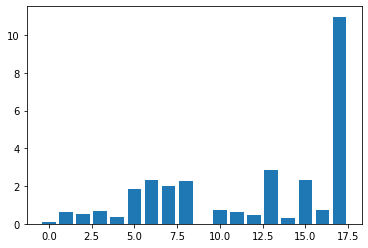

In [13]:
# feature selection - f_classif (ANOVA)
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [14]:
'''Principal Component Analysis (or PCA) uses linear algebra to transform the dataset into a compressed form.
Generally this is called a data reduction technique. A property of PCA is that you can choose the number of dimensions or principal component in the transformed result.
In the example below, we use PCA and select 5 principal components.'''

from sklearn.decomposition import PCA
pca = PCA(n_components=5)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [9.67484265e-01 3.10529835e-02 1.45420350e-03 4.59483043e-06
 2.14593109e-06]
[[ 1.09364587e-03  1.16064913e-04 -9.58999386e-07 -3.42594738e-02
   2.34921529e-04  7.27180637e-06  7.23099346e-06  7.25151759e-06
   7.20330107e-06 -2.23151857e-06 -9.80276044e-01 -6.85877150e-07
  -3.40316957e-05  7.77272705e-06 -1.56594093e-06  8.96790864e-06
   8.22796090e-04 -1.94636130e-01]
 [-1.12157258e-03 -6.89966566e-05 -6.97912870e-08  1.15925856e-01
   2.04035492e-04  1.38388069e-05  1.38309689e-05  1.41481610e-05
   1.39481085e-05  1.28945528e-05 -1.97334743e-01  6.63063672e-06
   1.89585427e-04  3.42857677e-04  1.60395579e-06 -1.58635680e-05
   1.80387389e-04  9.73457089e-01]
 [-7.94632831e-03  1.02671970e-05  3.29533827e-06 -9.92632107e-01
  -1.30217784e-03 -1.60452496e-05 -1.76302283e-05 -1.78694909e-05
  -1.64203485e-05  2.17031170e-06  1.07770920e-02 -1.09197908e-05
   5.91263807e-04 -1.02845503e-03  1.91974391e-05  1.83428335e-04
  -2.51290424e-03  1.20385865e-01]
 [ 9.